IPL Prediction


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
ipl_match=pd.read_csv("matches.csv")
ipl_ball_by_ball=pd.read_csv("deliveries.csv")
ipl_match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
ipl_ball_by_ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
ipl_ball_by_ball.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [5]:
Total_score=ipl_ball_by_ball.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [6]:
Total_score

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [7]:
Total_score=Total_score[Total_score['inning']==1]

In [8]:
Total_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [9]:
ipl=ipl_match.merge(Total_score[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [11]:
ipl.rename({'total_runs':'1st_ing_score'},axis=1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,1st_ing_score
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [12]:
ipl['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
teams=['Sunrisers Hyderabad','Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders',
       'Kings XI Punjab','Chennai Super Kings',
        'Rajasthan Royals','Delhi Capitals']

In [14]:
ipl['team1']=ipl['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
ipl['team2']=ipl['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
ipl['team1']=ipl['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
ipl['team2']=ipl['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [15]:
ipl=ipl[ipl['team1'].isin(teams)]
ipl=ipl[ipl['team2'].isin(teams)]

In [16]:
ipl.shape

(641, 20)

In [17]:
ipl['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [18]:
ipl=ipl[ipl['dl_applied']==0]

In [19]:
ipl=ipl[['match_id','city','winner','total_runs']]

In [20]:
final_df= ipl.merge(ipl_ball_by_ball,on='match_id')

In [21]:
final_df=final_df[final_df['inning']==2]

In [22]:
final_df.shape

(72413, 24)

In [23]:
full_match=final_df

In [24]:
final_df['cur_score']=final_df.groupby('match_id').cumsum()['total_runs_y']


In [25]:
final_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cur_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [26]:
final_df['runs_left']=final_df['total_runs_x']-final_df['cur_score']

In [27]:
final_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cur_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [28]:
final_df['balls_left']=126-(final_df['over']*6+final_df['ball'])

In [29]:
final_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cur_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [30]:
final_df['player_dismissed']=final_df['player_dismissed'].fillna("0")
final_df['player_dismissed']=final_df['player_dismissed'].apply(lambda x:x if x=='0' else '1' )
final_df['player_dismissed']=final_df['player_dismissed'].astype('int')
wickets=final_df.groupby("match_id").cumsum()['player_dismissed'].values
final_df['wic_left']=10-wickets


In [31]:
final_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cur_score,runs_left,balls_left,wic_left
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-5,0,3


In [32]:
final_df['cur_rate']=final_df['cur_score']*6/(120-final_df['balls_left'])

In [33]:
final_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cur_score,runs_left,balls_left,wic_left,cur_rate
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,117,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,204,116,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,200,115,10,8.4


In [34]:
final_df['req_rate']=final_df['runs_left']/(final_df['balls_left']/6)

In [35]:
final_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,cur_score,runs_left,balls_left,wic_left,cur_rate,req_rate
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.4,10.434783


In [36]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [37]:
final_df['result']=final_df.apply(result,axis=1)

In [38]:
final_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,cur_score,runs_left,balls_left,wic_left,cur_rate,req_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.0,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.0,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.5,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.4,10.434783,0


In [39]:
highlights=final_df

In [40]:
highlights.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,cur_score,runs_left,balls_left,wic_left,cur_rate,req_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.0,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.0,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.5,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.4,10.434783,0


In [41]:
final_df=final_df[['batting_team','bowling_team','city','runs_left','balls_left',
         'wic_left','total_runs_x','cur_rate','req_rate','result']]

In [42]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wic_left,total_runs_x,cur_rate,req_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.0,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.0,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.0,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.5,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.4,10.434783,0


In [43]:
final_df=final_df.sample(final_df.shape[0])

In [44]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wic_left,total_runs_x,cur_rate,req_rate,result
41308,Deccan Chargers,Mumbai Indians,Mumbai,97,50,6,178,6.942857,11.64,0


In [45]:
final_df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Rajasthan Royals',
       'Chennai Super Kings', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Delhi Capitals', 'Deccan Chargers'], dtype=object)

In [46]:
final_df['bowling_team'].unique()

array(['Kings XI Punjab', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Delhi Daredevils', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians'],
      dtype=object)

In [47]:
final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [48]:
final_df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Rajasthan Royals',
       'Chennai Super Kings', 'Mumbai Indians', 'Sunrisers Hyderabad'],
      dtype=object)

In [49]:
final_df['bowling_team'].unique()

array(['Kings XI Punjab', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Mumbai Indians'],
      dtype=object)

In [50]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wic_left,total_runs_x,cur_rate,req_rate,result
148340,Kings XI Punjab,Chennai Super Kings,Mohali,42,43,7,172,10.12987,5.860465,1


In [51]:
final_df.dropna(inplace=True)

In [52]:
final_df.isnull().sum()


batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wic_left        0
total_runs_x    0
cur_rate        0
req_rate        0
result          0
dtype: int64

In [53]:
final_df=final_df[final_df['balls_left']!=0]

# Train Test


In [57]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [58]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wic_left,total_runs_x,cur_rate,req_rate
14435,Kings XI Punjab,Chennai Super Kings,Chennai,165,109,10,181,8.727273,9.082569
113312,Chennai Super Kings,Mumbai Indians,Mumbai,78,39,6,187,8.074074,12.000000
103633,Rajasthan Royals,Sunrisers Hyderabad,Visakhapatnam,56,51,9,127,6.173913,6.588235
103880,Chennai Super Kings,Mumbai Indians,Mumbai,51,56,8,183,12.375000,5.464286
57619,Chennai Super Kings,Royal Challengers Bangalore,Mumbai,69,31,7,175,7.146067,13.354839
...,...,...,...,...,...,...,...,...,...
27609,Kings XI Punjab,Sunrisers Hyderabad,Kimberley,132,97,10,168,9.391304,8.164948
97415,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,30,19,8,160,7.722772,9.473684
74405,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,103,76,9,154,6.954545,8.131579
17981,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,89,71,9,175,10.530612,7.521127


In [59]:
X_train['batting_team'].unique()

array(['Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf= ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first' ),['batting_team','bowling_team','city'])
],remainder='passthrough')

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [62]:
pipe=Pipeline(steps=[('steps1',trf),('steps2',LogisticRegression(solver='liblinear'))])

In [63]:
X_train.describe()

,runs_left,balls_left,wic_left,total_runs_x,cur_rate,req_rate
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,92.695057,62.920453,7.558285,165.779318,7.450389,10.350503
std,49.991239,33.252690,2.123501,29.275364,2.276492,13.703382
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,53.000000,35.000000,6.000000,147.000000,6.272727,7.157895
50%,92.000000,64.000000,8.000000,165.000000,7.500000,8.886076
75%,130.000000,92.000000,9.000000,185.000000,8.700000,10.892308
max,249.000000,119.000000,10.000000,250.000000,42.000000,678.000000


In [64]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('steps1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('steps2', LogisticRegression(solver='liblinear'))])

In [65]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wic_left,total_runs_x,cur_rate,req_rate
117817,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,112,54,6,185,6.636364,12.444444
82094,Kolkata Knight Riders,Mumbai Indians,Mumbai,85,38,5,170,6.219512,13.421053
13313,Mumbai Indians,Rajasthan Royals,Mumbai,101,113,10,103,1.714286,5.362832
51553,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,118,85,10,171,9.085714,8.329412
120427,Delhi Capitals,Sunrisers Hyderabad,Raipur,117,80,9,158,6.150000,8.775000
...,...,...,...,...,...,...,...,...,...
14736,Sunrisers Hyderabad,Kolkata Knight Riders,Hyderabad,123,58,6,204,7.838710,12.724138
84738,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,109,52,6,190,7.147059,12.576923
73424,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,89,80,8,130,6.150000,6.675000
17253,Rajasthan Royals,Kolkata Knight Riders,Kolkata,101,80,7,147,6.900000,7.575000


In [66]:
y_pred=pipe.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8045413133366038

In [68]:
pipe.predict_proba(X_test)[10]

array([0.97548251, 0.02451749])

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2154658006588659

In [78]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

# Random Forest

In [79]:
X1_train,X1_test,y1_train,y1_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [81]:
pipe1=Pipeline(steps=[('steps1',trf),('steps2',RandomForestClassifier())])

In [82]:
pipe1.fit(X1_train,y1_train)

Pipeline(steps=[('steps1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('steps2', RandomForestClassifier())])

In [83]:
y1_pred=pipe1.predict(X1_test)

In [84]:
accuracy_score(y1_test,y1_pred)

0.9988786880650361

In [85]:
pipe1.predict_proba(X1_test)[55]

array([0.97, 0.03])

# SVM

In [77]:
X2_train,X2_test,y2_train,y2_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [78]:
 from sklearn.svm import SVC

In [79]:
pipe2=Pipeline(steps=[('steps1',trf),('steps2',SVC(gamma='auto'))])

In [80]:
pipe2.fit(X2_train,y2_train)

Pipeline(steps=[('steps1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('steps2', SVC(gamma='auto'))])

In [81]:
y2_pred=pipe2.predict(X2_test)

In [82]:
accuracy_score(y2_test,y2_pred)

0.9044692737430168

In [83]:
r2_score(y2_test,y2_pred)

0.6167594112573385

# Data Visualization

In [86]:
ipl_match['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

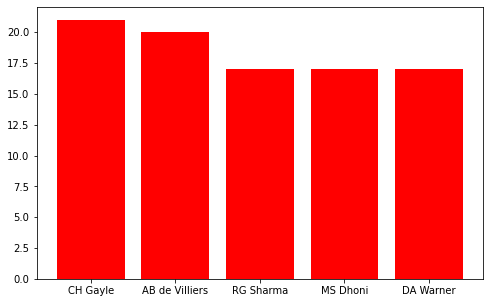

In [87]:
plt.figure(figsize=(8,5))
plt.bar(list(ipl_match['player_of_match'].value_counts()[0:5].keys()),list(ipl_match['player_of_match'].value_counts()[0:5]),
        color='red')
plt.show()      

In [88]:
most_runs=pd.read_csv("most_runs.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'most_runs.csv'

In [89]:
most_runs.head()


NameError: name 'most_runs' is not defined

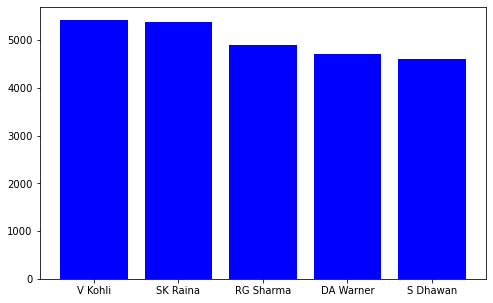

In [209]:
plt.figure(figsize=(8,5))
plt.bar(list(most_runs['batsman'][0:5]),list(most_runs['total_runs'][0:5]),
        color='blue')
plt.show() 

In [90]:
x=['Logistic','RandomForest','SVM']
h=[accuracy_score(y_test,y_pred),accuracy_score(y1_test,y1_pred),accuracy_score(y2_test,y2_pred)]

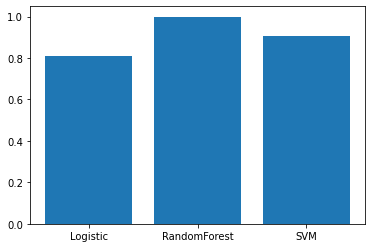

In [91]:
plt.bar(x,h)
plt.show()

# Full Match Scenario

In [90]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [91]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wic_left','total_runs_x','cur_rate','req_rate']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wic_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [92]:
temp_df,target = match_progression(highlights,10,pipe1)
temp_df

Target- 158


,end_of_over,runs_after_over,wickets_in_over,lose,win
1093,1,6,0,6.0,94.0
1099,2,15,0,0.0,100.0
1105,3,7,0,0.0,100.0
1111,4,11,1,0.0,100.0
1117,5,3,1,0.0,100.0
1123,6,19,0,0.0,100.0
1129,7,3,0,0.0,100.0
1135,8,9,0,0.0,100.0
1141,9,3,0,1.0,99.0
1147,10,9,1,4.0,96.0


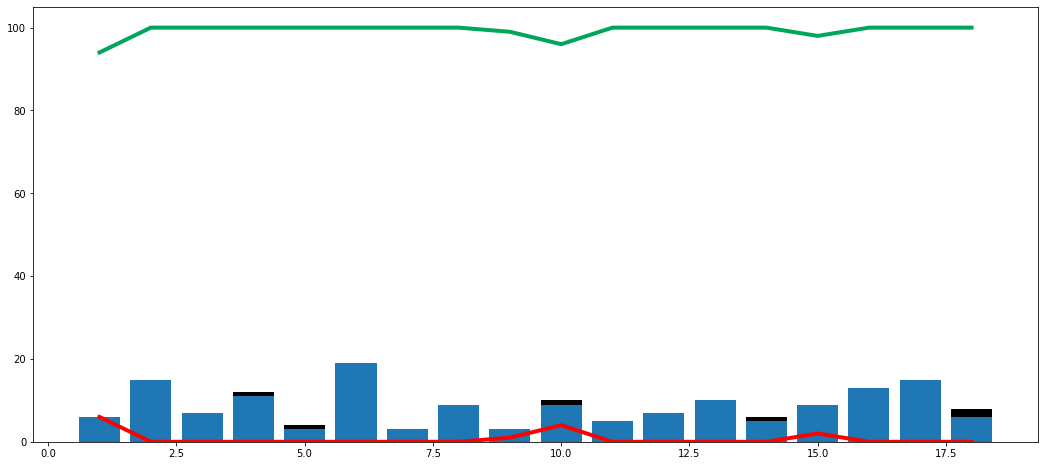

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))

plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.bar(temp_df['end_of_over'], temp_df['wickets_in_over'], bottom=temp_df['runs_after_over'], color='black')
plt.show()

In [94]:
temp_df,target = match_progression(highlights,10,pipe)
temp_df

Target- 158


,end_of_over,runs_after_over,wickets_in_over,lose,win
1093,1,6,0,23.9,76.1
1099,2,15,0,13.9,86.1
1105,3,7,0,12.7,87.3
1111,4,11,1,16.0,84.0
1117,5,3,1,29.3,70.7
1123,6,19,0,14.8,85.2
1129,7,3,0,16.6,83.4
1135,8,9,0,13.5,86.5
1141,9,3,0,15.0,85.0
1147,10,9,1,20.8,79.2


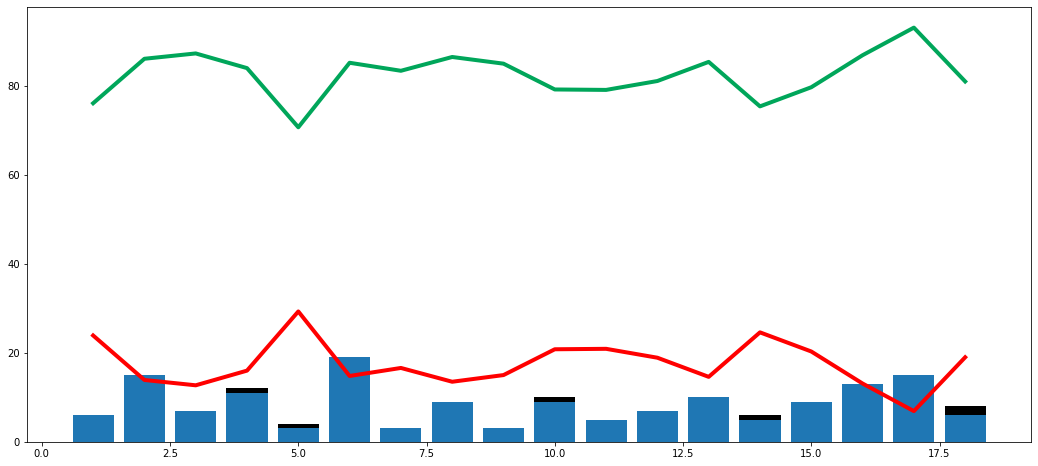

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))

plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.bar(temp_df['end_of_over'], temp_df['wickets_in_over'], bottom=temp_df['runs_after_over'], color='black')
plt.show()